In [1]:

import numpy as np
from keras.datasets import mnist




### Load our pretrained model

In [2]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

In [3]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


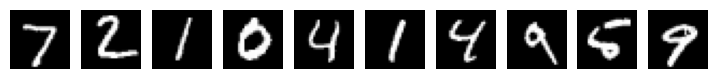

In [4]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

313/313 [==============================] - 2s 6ms/step


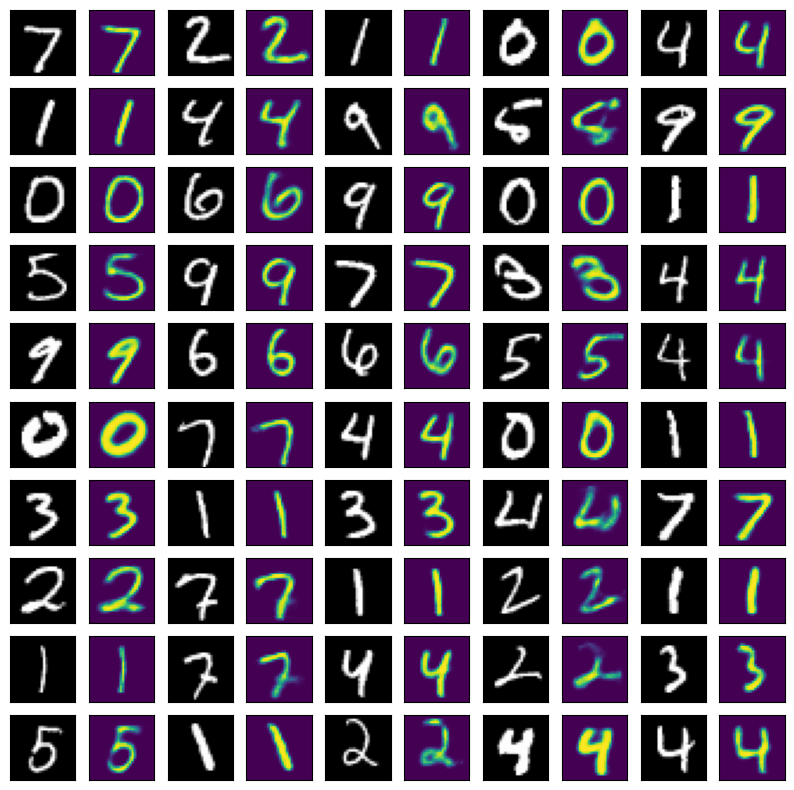

In [5]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

Firstly, we trained an autoencoder code with MNIST dataset and printed the output for several random digits . if we compare this with the original we can say it performmed well.
going further, we are trying to print the first letter of my name and  random digits in this exercise. We will use the MNIST data set to train the  newly created auto encoder with the image we created with our first letter. Also, image should be a 28*28 size so we have to take the neurons as 784 . 

In [6]:
#creating auto encoder

from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 16)                1616      
                                                                 
 dense_4 (Dense)             (None, 100)               1700      
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

In [7]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)


Epoch 1/10
469/469 [==============================] - 11s 21ms/step - loss: 0.1906 - val_loss: 0.1323
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1244 - val_loss: 0.1182
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1140 - val_loss: 0.1091
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1080 - val_loss: 0.1049
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1042 - val_loss: 0.1028
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1018 - val_loss: 0.1004
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1000 - val_loss: 0.0994
Epoch 8/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0986 - val_loss: 0.0980
Epoch 9/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0971 - val_loss: 0.0967
Epoch 10/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0957 - val_l

In [8]:
#saving the autoencoder
autoencoder.save('trained_autoencoder.h5')

In [9]:

# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

from PIL import Image

# Load new character images
new_images = ['s.png', 's1.png', 's2.png', 's3.png', 's4.png']
new_labels = np.ones(len(new_images)) * 10 # label new character images as "10"
new_images = []
for img_file in new_images:
    img = Image.open(img_file).convert('L') # convert to grayscale
    img = img.resize((28, 28)) # resize to 28x28
    new_images.append(np.array(img))
new_images = np.array(new_images)
new_images = np.reshape(new_images, (-1, 784))
train_images = train_images.reshape(60000, 784)
train_images = np.concatenate([train_images, new_images])



# Append new character images to training data
train_images = np.concatenate([train_images, new_images])
train_labels = np.concatenate([train_labels, new_labels])

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# oversample 

train_images = train_images.astype('float') / 255
test_images = test_images.astype('float') / 255
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))



# Concatenate new images with MNIST data
train_images = np.concatenate((train_images, new_images))
train_labels = np.concatenate((train_labels, new_labels))




(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


1/1 [==============================] - 0s 32ms/step
(1, 784)


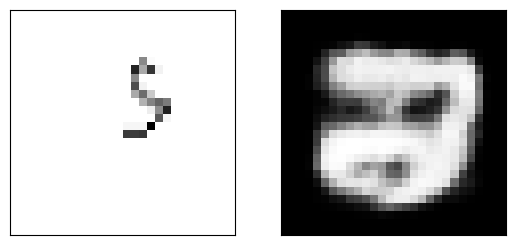

In [10]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

updated_model = keras.models.load_model('trained_autoencoder.h5')


####################################
# load a sample image
image = tf.keras.utils.load_img('s4.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()

As we can, this autoencoder doesn't do a good job with this new symbol. So, we will train the autoencoder more to get the reults more accurate.

In [11]:
input_arr = input_arr.reshape(784)

new_images = [input_arr for _ in range(1000)]

new_images = np.array(new_images)
new_images.shape

(1000, 784)

In [12]:
from tensorflow import keras
updated_model = keras.models.load_model('trained_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = pretrained_model.fit(
    x=new_images, # For autoencoders, both the input and the target are the same
    y=new_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images, new_images),
    callbacks=[early_stop]
)

Epoch 1/10
8/8 [==============================] - 1s 51ms/step - loss: 2.1179 - val_loss: 0.6209
Epoch 2/10
8/8 [==============================] - 0s 32ms/step - loss: 0.3257 - val_loss: 0.0524
Epoch 3/10
8/8 [==============================] - 0s 32ms/step - loss: 0.0405 - val_loss: 0.0232
Epoch 4/10
8/8 [==============================] - 0s 31ms/step - loss: 0.0183 - val_loss: 0.0175
Epoch 5/10
8/8 [==============================] - 0s 31ms/step - loss: 0.0139 - val_loss: 0.0126
Epoch 6/10
8/8 [==============================] - 0s 32ms/step - loss: 0.0114 - val_loss: 0.0108
Epoch 7/10
8/8 [==============================] - 0s 30ms/step - loss: 0.0106 - val_loss: 0.0105
Epoch 8/10
8/8 [==============================] - 0s 31ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 9/10
8/8 [==============================] - 0s 32ms/step - loss: 0.0103 - val_loss: 0.0102
Epoch 10/10
8/8 [==============================] - 0s 31ms/step - loss: 0.0102 - val_loss: 0.0102


###Performance of the  trained autoencoder 

1/1 [==============================] - 0s 25ms/step
(1, 784)


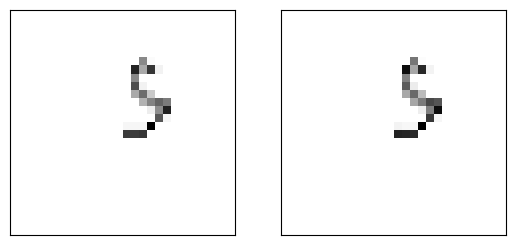

In [13]:

###Performance of the  trained autoencoder 
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('s.png', target_size=(28, 28), color_mode = "grayscale")
image = tf.keras.utils.load_img('s1.png', target_size=(28, 28), color_mode = "grayscale")
image = tf.keras.utils.load_img('s2.png', target_size=(28, 28), color_mode = "grayscale")
image = tf.keras.utils.load_img('s3.png', target_size=(28, 28), color_mode = "grayscale")
image = tf.keras.utils.load_img('s4.png', target_size=(28, 28), color_mode = "grayscale")



####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()

As we can see, the updated autoencoder does a much better job with the new symbol in predicting accuaretly the symbol compared to previous one.

We will test how our model will do on original 10 digits

In [14]:
###Load the original 10 digits dataset and test the autoencoder on them.

from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


313/313 [==============================] - 3s 8ms/step


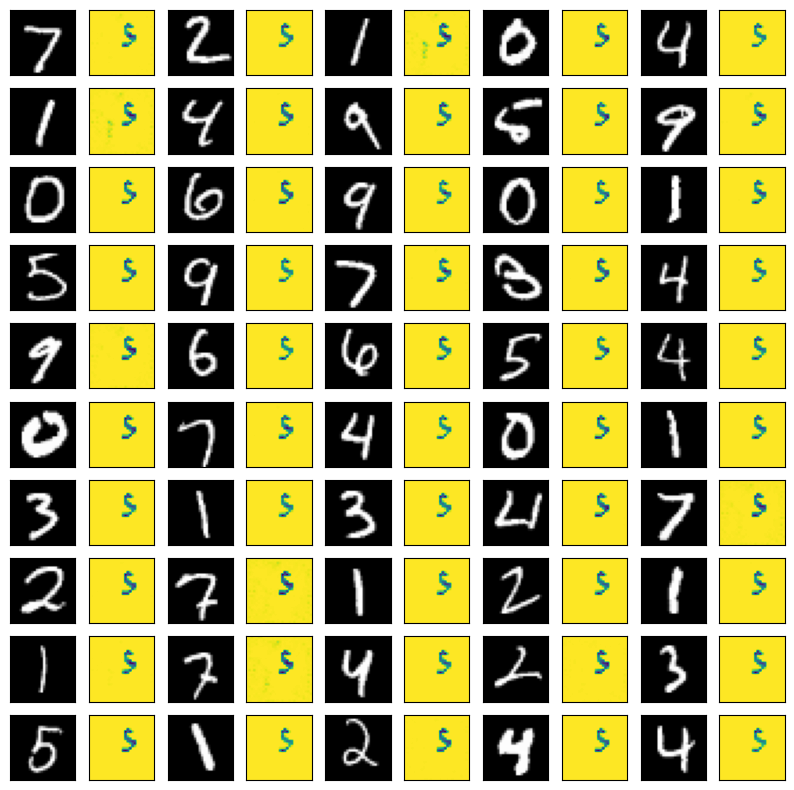

In [17]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()